Importing Libraries

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
sns.set_style('darkgrid')


Importing the CSV File To boats and checking the datatypes and contents

In [38]:
boats = pd.read_csv('boat_data.csv')
print(boats.head())
boats.describe


       Price            Boat Type          Manufacturer                 Type  \
0   CHF 3337          Motor Yacht  Rigiflex power boats  new boat from stock   
1   EUR 3490  Center console boat     Terhi power boats  new boat from stock   
2   CHF 3770           Sport Boat    Marine power boats  new boat from stock   
3  DKK 25900           Sport Boat    Pioner power boats  new boat from stock   
4   EUR 3399         Fishing Boat    Linder power boats  new boat from stock   

   Year Built  Length  Width       Material  \
0        2017    4.00   1.90            NaN   
1        2020    4.00   1.50  Thermoplastic   
2           0    3.69   1.42      Aluminium   
3        2020    3.00   1.00            NaN   
4        2019    3.55   1.46      Aluminium   

                                     Location  Number of views last 7 days  
0      Switzerland Â» Lake Geneva Â» VÃ©senaz                          226  
1                    Germany Â» BÃ¶nningstedt                           75  
2  Sw

<bound method NDFrame.describe of           Price            Boat Type           Manufacturer  \
0      CHF 3337          Motor Yacht   Rigiflex power boats   
1      EUR 3490  Center console boat      Terhi power boats   
2      CHF 3770           Sport Boat     Marine power boats   
3     DKK 25900           Sport Boat     Pioner power boats   
4      EUR 3399         Fishing Boat     Linder power boats   
...         ...                  ...                    ...   
9883   CHF 4900           Sport Boat    Sea Ray power boats   
9884   EUR 4516           Sport Boat                    NaN   
9885   EUR 4499           Sport Boat  BlueCraft power boats   
9886   EUR 4300         Pontoon Boat      Whaly power boats   
9887   CHF 3780         Fishing Boat    DarekCo power boats   

                              Type  Year Built  Length  Width       Material  \
0              new boat from stock        2017    4.00   1.90            NaN   
1              new boat from stock        2020   

Checking the Null Files and Data Types of the Columns

In [39]:
print(boats.info())
print(boats.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   object 
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9879 non-null   float64
 6   Width                        9832 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 772.6+ KB
None
Price                             0
Boat Type                         0
Manufacturer                   1338
Type                

Dropping the Null Values or the Values which are difficult to be Imputed

In [40]:

boats = (boats[boats['Year Built'] != 0])
boats = boats.dropna()
print(boats.isnull().sum())
boats.shape


Price                          0
Boat Type                      0
Manufacturer                   0
Type                           0
Year Built                     0
Length                         0
Width                          0
Material                       0
Location                       0
Number of views last 7 days    0
dtype: int64


(6589, 10)

Splitting the Price Column to Standardize the Currency to USD


In [41]:
boats['currency'] = boats['Price'].str[:3]
boats['amount'] = boats['Price'].str[4:].str.strip().astype('int')
print(boats.currency.unique())
boats.head()





['EUR' 'CHF' 'DKK' 'Â£ ']


,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,currency,amount
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR,3490
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR,3399
10,CHF 3500,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,Switzerland Â» Seengen,239,CHF,3500
12,EUR 3500,Sport Boat,GS Nautica power boats,Used boat,2004,4.70,2.00,GRP,Italy Â» Lake Garda Â» Moniga del Garda (BS),69,EUR,3500
13,CHF 4600,Runabout,Kimple power boats,new boat from stock,2020,4.40,1.65,Aluminium,Switzerland Â» Zugersee Â» Neuheim,113,CHF,4600


Converting the Amount Numbers to USD Value

In [42]:
for a,b in boats.iterrows():
    if b['currency'] == 'CHF':
    	boats.loc[a,'amount'] = np.round(boats.loc[a,'amount'] *1.05,2)
    elif b['currency'] == 'EUR':
    	boats.loc[a,'amount'] = np.round(boats.loc[a,'amount'] *1.06,2)
    elif b['currency'] == 'DKK':
    	boats.loc[a,'amount'] = np.round(boats.loc[a,'amount'] *0.14,2)
    elif b['currency'] == 'Â£ ':
    	boats.loc[a,'amount'] = np.round(boats.loc[a,'amount'] *1.23,2)


    
boats['currency'] = 'USD'

boats


,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,currency,amount
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,USD,3699.40
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,USD,3602.94
10,CHF 3500,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,Switzerland Â» Seengen,239,USD,3675.00
12,EUR 3500,Sport Boat,GS Nautica power boats,Used boat,2004,4.70,2.00,GRP,Italy Â» Lake Garda Â» Moniga del Garda (BS),69,USD,3710.00
13,CHF 4600,Runabout,Kimple power boats,new boat from stock,2020,4.40,1.65,Aluminium,Switzerland Â» Zugersee Â» Neuheim,113,USD,4830.00
...,...,...,...,...,...,...,...,...,...,...,...,...
9877,CHF 5000,Cabin Boat,Princess power boats,Used boat,1974,7.20,2.70,GRP,Switzerland Â» Rhein Â» MÃ¶hlin,1299,USD,5250.00
9878,CHF 4999,"Sport Boat,Wakeboard/Wakesurf,Water ski",Tullio Abbate power boats,"Used boat,Unleaded",1980,6.00,2.10,GRP,Switzerland Â» Lake of Zurich Â» Rafz,1917,USD,5248.95
9882,CHF 4950,Fishing Boat,Staempfli power boats,"Used boat,Unleaded",1984,6.00,1.62,Plastic,Switzerland Â» Bielersee Â» Gerolfingen,288,USD,5197.50
9885,EUR 4499,Sport Boat,BlueCraft power boats,"new boat from stock,Unleaded",2020,4.40,1.80,GRP,Germany Â» Nordrhein-Westfalen Â» Wesel,354,USD,4768.94


Checking the output of the changes made with null and irrelevant Values

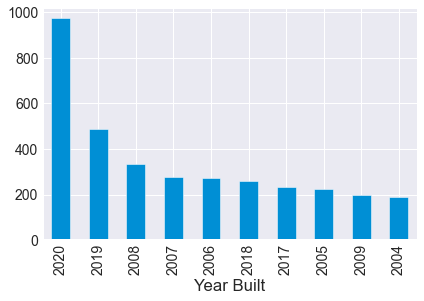

In [43]:
boats.groupby('Year Built').size().sort_values(ascending = False).head(10).plot(kind = 'bar')
plt.show()

Understanding the data between the columns and unique values it has

In [44]:
print(boats.columns)

for c in boats.columns:
	print(str(c) + ' : ' + str(boats[c].nunique()))
    

Index(['Price', 'Boat Type', 'Manufacturer', 'Type', 'Year Built', 'Length',
       'Width', 'Material', 'Location', 'Number of views last 7 days',
       'currency', 'amount'],
      dtype='object')
Price : 2350
Boat Type : 109
Manufacturer : 807
Type : 23
Year Built : 78
Length : 1341
Width : 493
Material : 10
Location : 2314
Number of views last 7 days : 654
currency : 1
amount : 2272


Splitting The Location to group by Countries

In [45]:
#boats.groupby('Location').size().sort_values(ascending = False)
#boats['countries'] = boats['Location'].str.split('»')
boats['country'] = boats['Location'].apply(lambda x: x.split('Â»')[0])
boats['country']

1           Germany 
4           Germany 
10      Switzerland 
12            Italy 
13      Switzerland 
            ...     
9877    Switzerland 
9878    Switzerland 
9882    Switzerland 
9885        Germany 
9887    Switzerland 
Name: country, Length: 6589, dtype: object

Splitting the Type of boats into individual Types to find the popular Type of Boats

In [46]:
bruv = boats['Type'].str.split(',')

list_of_list = ['Used boat','Unleaded', 'Diesel','Electric','Gas','Display Model','new boat from stock','Propane','Hybrid','new boat on order']

for c,d in boats.iterrows():
    for i in list_of_list:
        if i in bruv[c]:
            boats.loc[c,i] = True
        

boats = boats.fillna(False)


boats.Type.unique()
        

array(['new boat from stock', 'Used boat,Electric', 'Used boat',
       'Used boat,Unleaded', 'Used boat,Diesel',
       'new boat from stock,Unleaded', 'Unleaded',
       'new boat on order,Unleaded', 'new boat from stock,Gas',
       'new boat on order', 'Diesel', 'Display Model,Unleaded',
       'Display Model', 'Used boat,Gas', 'new boat from stock,Electric',
       'new boat from stock,Diesel', 'new boat on order,Diesel',
       'new boat from stock,Hybrid', 'Display Model,Diesel',
       'Display Model,Gas', 'Display Model,Electric', 'Electric',
       'Used boat,Propane'], dtype=object)

Q: Is it the most expensive boats that get the most views?


In [47]:
boats.nlargest(10,'amount').sort_values('Number of views last 7 days', ascending = False)

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,...,new boat from stock,Used boat,Electric,Unleaded,Diesel,new boat on order,Gas,Display Model,Hybrid,Propane
3327,EUR 23500000,Mega Yacht,Benetti power boats,"Used boat,Diesel",2007,56.00,10.40,Steel,Greece Â» Athen,419,...,False,True,False,False,True,False,False,False,False,False
3317,EUR 11900000,Mega Yacht,Sunseeker power boats,"Used boat,Diesel",2019,35.36,7.35,GRP,Italy Â» San Remo,317,...,False,True,False,False,True,False,False,False,False,False
3323,EUR 9900000,Mega Yacht,Baglietto power boats,"Used boat,Diesel",2010,41.70,8.00,Aluminium,Italy Â» La Spezia,267,...,False,True,False,False,True,False,False,False,False,False
3321,EUR 10800000,Mega Yacht,Sunseeker power boats,"Used boat,Diesel",2018,35.20,7.35,GRP,Spain Â» Altea,225,...,False,True,False,False,True,False,False,False,False,False
3322,EUR 10500000,Mega Yacht,Sanlorenzo power boats,Used boat,2016,36.50,7.60,GRP,Netherlands,220,...,False,True,False,False,False,False,False,False,False,False
3332,EUR 9250000,Mega Yacht,Sunseeker power boats,Used boat,2012,40.05,8.09,GRP,Netherlands,219,...,False,True,False,False,False,False,False,False,False,False
3319,EUR 11000000,Mega Yacht,Sunseeker power boats,"Used boat,Diesel",2017,35.36,7.35,GRP,Monaco,197,...,False,True,False,False,True,False,False,False,False,False
3340,EUR 8350000,Motor Yacht,Curvelle power boats,"Used boat,Diesel",2013,34.10,9.00,Carbon Fiber,Croatia (Hrvatska) Â» Dubrovnik,133,...,False,True,False,False,True,False,False,False,False,False
3339,EUR 8800000,Mega Yacht,Cantiere delle Marche power boats,"Used boat,Diesel",2016,31.00,7.43,Steel,Italy,132,...,False,True,False,False,True,False,False,False,False,False
3341,EUR 7900000,Mega Yacht,Sanlorenzo power boats,Used boat,2019,31.08,7.06,GRP,Netherlands,122,...,False,True,False,False,False,False,False,False,False,False


In [48]:
boats[boats['Number of views last 7 days']>boats['Number of views last 7 days'].mean()].nlargest(10,'amount').sort_values('Number of views last 7 days', ascending = False)

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,...,new boat from stock,Used boat,Electric,Unleaded,Diesel,new boat on order,Gas,Display Model,Hybrid,Propane
3362,EUR 5900000,Mega Yacht,Rodriguez Group (Italyachts) power boats,"Used boat,Diesel",2010,41.10,8.40,Aluminium,France Â» South France-Contact SCHMIDT YACHTING,986,...,False,True,False,False,True,False,False,False,False,False
3327,EUR 23500000,Mega Yacht,Benetti power boats,"Used boat,Diesel",2007,56.00,10.40,Steel,Greece Â» Athen,419,...,False,True,False,False,True,False,False,False,False,False
3317,EUR 11900000,Mega Yacht,Sunseeker power boats,"Used boat,Diesel",2019,35.36,7.35,GRP,Italy Â» San Remo,317,...,False,True,False,False,True,False,False,False,False,False
3323,EUR 9900000,Mega Yacht,Baglietto power boats,"Used boat,Diesel",2010,41.70,8.00,Aluminium,Italy Â» La Spezia,267,...,False,True,False,False,True,False,False,False,False,False
3353,EUR 6800000,Mega Yacht,Cantieri di Pisa power boats,"Used boat,Diesel",2004,38.30,7.50,GRP,Greece,227,...,False,True,False,False,True,False,False,False,False,False
3321,EUR 10800000,Mega Yacht,Sunseeker power boats,"Used boat,Diesel",2018,35.20,7.35,GRP,Spain Â» Altea,225,...,False,True,False,False,True,False,False,False,False,False
3322,EUR 10500000,Mega Yacht,Sanlorenzo power boats,Used boat,2016,36.50,7.60,GRP,Netherlands,220,...,False,True,False,False,False,False,False,False,False,False
3332,EUR 9250000,Mega Yacht,Sunseeker power boats,Used boat,2012,40.05,8.09,GRP,Netherlands,219,...,False,True,False,False,False,False,False,False,False,False
3319,EUR 11000000,Mega Yacht,Sunseeker power boats,"Used boat,Diesel",2017,35.36,7.35,GRP,Monaco,197,...,False,True,False,False,True,False,False,False,False,False
3348,EUR 6950000,Mega Yacht,Sunseeker power boats,"Used boat,Diesel",2013,34.53,7.41,GRP,Monaco,163,...,False,True,False,False,True,False,False,False,False,False


<AxesSubplot:xlabel='amount', ylabel='Number of views last 7 days'>

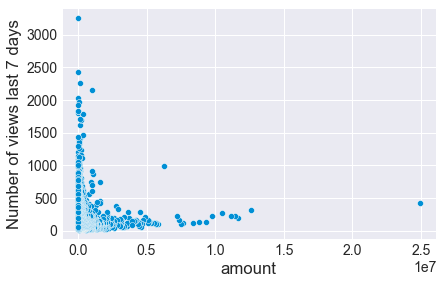

In [49]:
sns.scatterplot(data=boats, x='amount', y='Number of views last 7 days')

Finding any relationship between different Parameters 

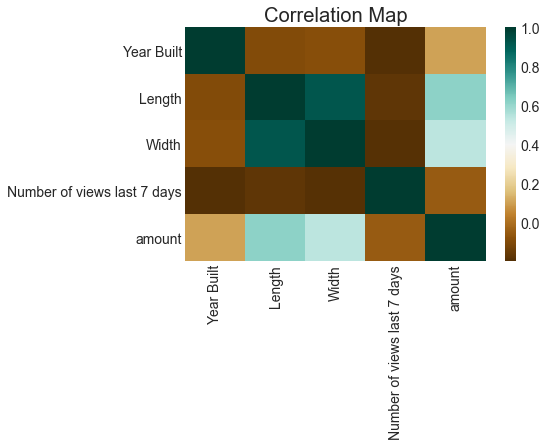

In [50]:
sns.heatmap(data = boats.iloc[:,:13].corr(), cmap = 'BrBG')
plt.title('Correlation Map')
plt.show()

Creating a new table called 'views' to focus on the most popular posts

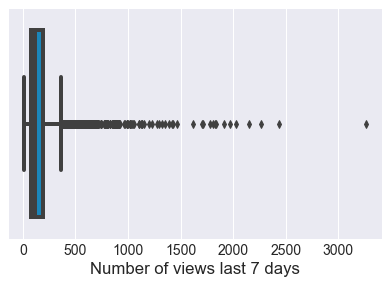

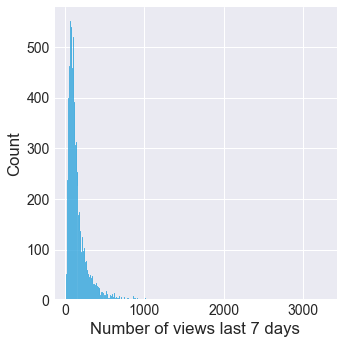

In [51]:

sns.boxplot(boats['Number of views last 7 days'])
sns.displot(boats['Number of views last 7 days'])
plt.show()
boats.describe()

views = boats[ boats['Number of views last 7 days'] > boats['Number of views last 7 days'].mean()].sort_values(by ='Number of views last 7 days', ascending = False )


Details of the analysis to figure out what category of posts are attractive and bring more poeple to the website and boost the viewership.

In [53]:


n_list = {}
for i in list_of_list:
    n_list[i] = float(views.loc[views[i]==True]['Number of views last 7 days'].sum())
bu = pd.DataFrame(n_list,index = [0])

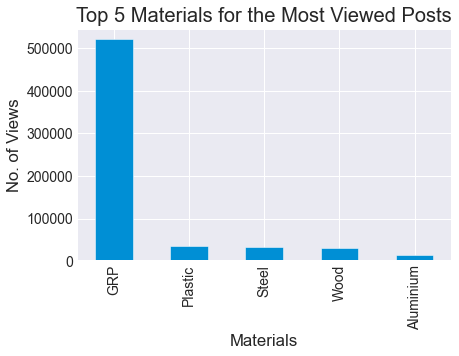

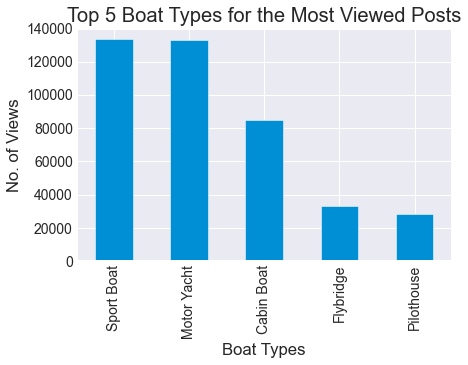

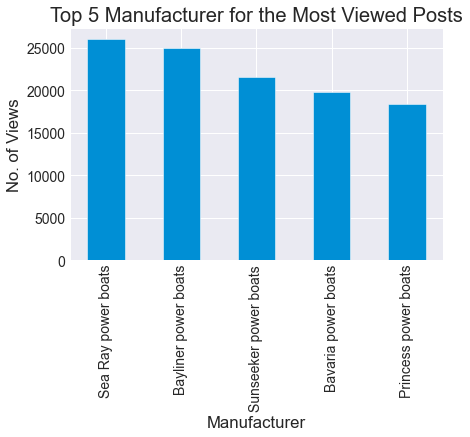

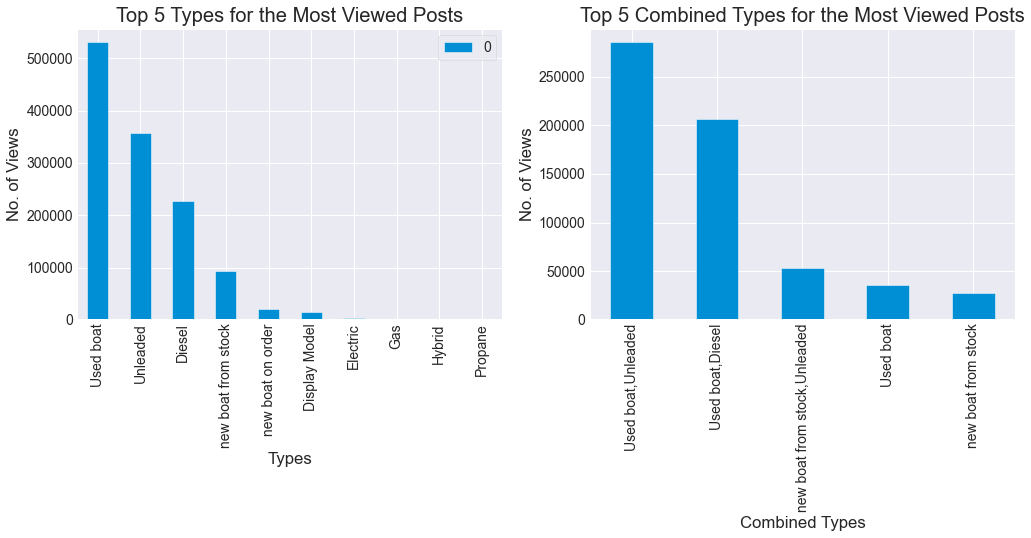

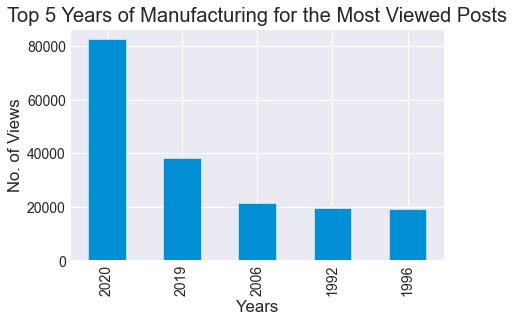

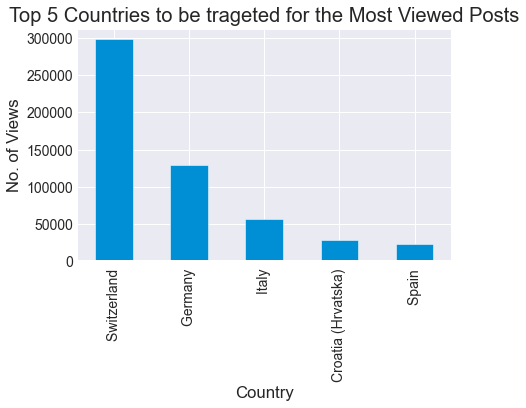

In [57]:
views.groupby('Material')['Number of views last 7 days'].sum().sort_values(ascending = False).head(5).plot(kind = 'bar')
plt.title('Top 5 Materials for the Most Viewed Posts')
plt.xlabel('Materials')
plt.ylabel('No. of Views')
plt.show()

views.groupby('Boat Type')['Number of views last 7 days'].sum().sort_values(ascending = False).head(5).plot(kind = 'bar')
plt.title('Top 5 Boat Types for the Most Viewed Posts')
plt.xlabel('Boat Types')
plt.ylabel('No. of Views')
plt.show()

views.groupby('Manufacturer')['Number of views last 7 days'].sum().sort_values(ascending = False).head(5).plot(kind = 'bar')
plt.title('Top 5 Manufacturer for the Most Viewed Posts')
plt.xlabel('Manufacturer')
plt.ylabel('No. of Views')
plt.show()

fig, ax = plt.subplots(1,2,figsize=(15,5))
bu.T.sort_values(by = 0, ascending = False).plot(kind = 'bar',ax = ax[0])
ax[0].set_title('Top 5 Types for the Most Viewed Posts')
ax[0].set_xlabel('Types')
ax[0].set_ylabel('No. of Views')


views.groupby('Type')['Number of views last 7 days'].sum().sort_values(ascending = False).head(5).plot(kind = 'bar',ax= ax[1])
plt.title('Top 5 Combined Types for the Most Viewed Posts')
plt.xlabel('Combined Types')
plt.ylabel('No. of Views')
plt.show()



views.groupby('Year Built')['Number of views last 7 days'].sum().sort_values(ascending = False).head(5).plot(kind = 'bar')
plt.title('Top 5 Years of Manufacturing for the Most Viewed Posts')
plt.xlabel('Years')
plt.ylabel('No. of Views')
plt.show()

views.groupby('country')['Number of views last 7 days'].sum().sort_values(ascending = False).head(5).plot(kind = 'bar')
plt.title('Top 5 Countries to be trageted for the Most Viewed Posts')
plt.xlabel('Country')
plt.ylabel('No. of Views')
plt.show()



STATISTICAL THINKING

In [55]:
round(views.mean(),2)

Year Built                       2003.61
Length                              9.64
Width                               3.08
Number of views last 7 days       323.40
amount                         208511.78
new boat from stock                 0.18
Used boat                           0.76
Electric                            0.01
Unleaded                            0.51
Diesel                              0.36
new boat on order                   0.03
Gas                                 0.00
Display Model                       0.02
Hybrid                              0.00
Propane                             0.00
dtype: float64

In [56]:
round(views.std(),2)

Year Built                         15.22
Length                              5.00
Width                               1.07
Number of views last 7 days       231.13
amount                         926900.97
new boat from stock                 0.38
Used boat                           0.43
Electric                            0.09
Unleaded                            0.50
Diesel                              0.48
new boat on order                   0.18
Gas                                 0.05
Display Model                       0.15
Hybrid                              0.02
Propane                             0.02
dtype: float64